# 2.1 A first look at a neural network

In [1]:
from keras.datasets import mnist
import numpy as np 
from IPython import display

In [ ]:
(train_img, train_lbl), (test_img, test_lbl) = mnist.load_data()

In [ ]:
train_img.shape

(60000, 28, 28)

In [ ]:
train_lbl.shape

(60000,)

In [ ]:
test_img.shape

(10000, 28, 28)

In [ ]:
test_lbl.shape

(10000,)

In [ ]:
from keras import models 
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))

* To make the network ready for training, we need to pick three more things, as part
of the compilation step:

     A loss function—How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

     An optimizer—The mechanism through which the network will update itself based on the data it sees and its loss function.

     Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

* Before training, we’ll preprocess the data by reshaping it into the shape the network
expects and scaling it so that all values are in the [0, 1] interval. Previously, our training
images, for instance, were stored in an array of shape (60000, 28, 28) of type
uint8 with values in the [0, 255] interval. We transform it into a float32 array of
shape (60000, 28 * 28) with values between 0 and 1.

In [ ]:
train_img = train_img.reshape((60000, 28*28))
train_img = train_img.astype('float32') / 255

test_img = test_img.reshape((10000, 28*28))
test_img = test_img.astype('float32') / 255

* We also need to categorically encode the labels

In [ ]:
from tensorflow.keras.utils import to_categorical 

train_lbl = to_categorical(train_lbl)
test_lbl = to_categorical(test_lbl)

* We’re now ready to train the network, which in Keras is done via a call to the network’s
fit method—we fit the model to its training data

In [ ]:
network.fit(train_img, train_lbl, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2594 - accuracy: 0.9246
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1032 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0677 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0495 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0367 - accuracy: 0.9890


* Two quantities are displayed during training: 
    * the loss of the network over the training
data, and 

    * the accuracy of the network over the training data.

* Now let’s
check that the model performs well on the test set, too:

In [ ]:
test_loss, test_acc = network.evaluate(test_img, test_lbl)
print(f'test accuracy : {test_acc}, \ntest loss: {test_loss}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0678 - accuracy: 0.9797
test accuracy : 0.9797000288963318, 
test loss: 0.06781697273254395


# 2.2 Data representations for neural networks

* a tensor is a container for data

* tensors are a generalization of matrices to an arbitrary number of dimensions
(note that in the context of tensors, a dimension is often called an axis).

## Scalars (0D tensors)

* A tensor that contains only one number is called a scalar (or scalar tensor, or 0-dimensional
tensor, or 0D tensor).

In [ ]:
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

## Vectors (1D tensors)

* An array of numbers is called a vector, or 1D tensor.

In [ ]:
x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [ ]:
x.ndim

1

* This vector has five entries and so is called a 5-dimensional vector. Don’t confuse a 5D
vector with a 5D tensor! A 5D vector has only one axis and has five dimensions along its
axis, whereas a 5D tensor has five axes

## Matrices (2D tensors)

* An array of vectors is a matrix, or 2D tensor. A matrix has two axes (often referred to
rows and columns).

In [ ]:
x = np.array([[1,2,3,4,5],
              [6,7,8,9,10],
              [11,12,13,14,15]
              ]
             )
x

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [ ]:
x.ndim

2

## 3D tensors and higher-dimensional tensors

In [ ]:
x = np.array(
              [
                  [ 
                      [5, 78, 2, 34, 0],
                      [6, 79, 3, 35, 1],
                      [7, 80, 4, 36, 2]
                  ],
                    
                  [
                      [5, 78, 2, 34, 0],
                      [6, 79, 3, 35, 1],
                      [7, 80, 4, 36, 2]
                  ],
                    
                  [
                      [5, 78, 2, 34, 0],
                      [6, 79, 3, 35, 1],
                      [7, 80, 4, 36, 2]
                  ]
              ]
             )

x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [ ]:
x.ndim

3

## Key attributes

A tensor is defined by three key attributes:

   Number of axes (rank)—For instance, a 3D tensor has three axes, and a matrix has
two axes. This is also called the tensor’s ndim in Python libraries such as Numpy.

   Shape—This is a tuple of integers that describes how many dimensions the tensor
has along each axis. For instance, the previous matrix example has shape
(3, 5), and the 3D tensor example has shape (3, 3, 5). A vector has a shape
with a single element, such as (5,), whereas a scalar has an empty shape, ().

   Data type (usually called dtype in Python libraries)—This is the type of the data
contained in the tensor; for instance, a tensor’s type could be float32, uint8,
float64, and so on. On rare occasions, you may see a char tensor. Note that
string tensors don’t exist in Numpy (or in most other libraries), because tensors
live in preallocated, contiguous memory segments: and strings, being variable
length, would preclude the use of this implementation.

In [ ]:
from keras.datasets import mnist 
(train_img, train_lbl), (test_img, test_lbl) = mnist.load_data()

In [ ]:
print(train_img.ndim)

3


In [ ]:
print(train_img.shape)

(60000, 28, 28)


In [ ]:
print(train_img.dtype)

uint8


In [ ]:
digit = train_img[4]
print(digit)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

In [ ]:
print(train_lbl[4])

9


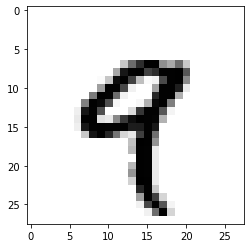

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Manipulating tensors in Numpy 

* Selecting specific elements in a tensor is called tensor slicing.

In [ ]:
my_slice = train_img[10:100]
print(my_slice.shape)

(90, 28, 28)


In [ ]:
# equivalent to the previous example 

my_slice_2 = train_img[10:100, :, :]
my_slice_2.shape

(90, 28, 28)

In [ ]:
# also equivalent to other previous two examples :D 

my_slice_3 = train_img[10:100, 0:28, 0:28]
my_slice_3.shape

(90, 28, 28)

you may select between any two indices along each tensor axis. For
instance, in order to select 14 × 14 pixels in the bottom-right corner of all images, you
do this:

In [ ]:
my_slice = train_img[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [ ]:
# it is also possible to use negative indices.

my_slice = train_img[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

## The notion of data batches

* Deep-learning models don’t process an entire dataset at once; rather,
they break the data into small batches

In [ ]:
# here’s one batch of our MNIST digits, cwith batch size of 128
batch = train_img[:128]
batch.shape

(128, 28, 28)

In [ ]:
# here is the next batch 
batch = train_img[128:256]
batch.shape

(128, 28, 28)

In [ ]:
# the nth batch
# batch = train_img[128*n : 128 * (n+1)]


## Real-world examples of data tensors

* Let’s make data tensors more concrete with a few examples similar to what you’ll
encounter later. The data you’ll manipulate will almost always fall into one of the following
categories:

     Vector data—2D tensors of shape (samples, features)

     Timeseries data or sequence data—3D tensors of shape (samples, timesteps,features)

     Images—4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)

     Video—5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

# 2.3 The gears of neural networks: tensor operations

* Much as any computer program can be ultimately reduced to a small set of binary
operations on binary inputs (AND, OR, NOR, and so on), all transformations learned
by deep neural networks can be reduced to a handful of tensor operations applied to
tensors of numeric data. For instance, it’s possible to add tensors, multiply tensors,
and so on.

In [ ]:
'''
+In our initial example, we were building our network by stacking Dense layers on top of each other

keras.layers.Dense(512, activation='relu')

This layer can be interpreted as a function, which takes as input a 2D tensor and
returns another 2D tensor—a new representation for the input tensor. Specifically, the
function is as follows (where W is a 2D tensor and b is a vector, both attributes of the
layer):

output = relu(dot(W, input) + b)
'''

## Element-wise operations

The relu operation and addition are element-wise operations: operations that are
applied independently to each entry in the tensors being considered



In [ ]:
def naive_relu(x):
  assert len(x.shape) == 2

  x = x.copy()  # avoid overwriting the input tensor.

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i,j], 0)

  return x 

In [ ]:
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape 

  x = x.copy()
  
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]

  return x   

* in Numpy, you can do the following element-wise operation, and it will be blazing
fast

In [ ]:
'''
z = x + y  -> element-wise addition 
z = np.maximum(z, 0.)  -> element-wise relu 
'''

'\nz = x + y  -> element-wise addition \nz = np.maximum(z, 0.)  -> element-wise relu \n'

## Broadcasting

* When possible, and if there’s no ambiguity, the smaller tensor will be broadcasted to
match the shape of the larger tensor. Broadcasting consists of two steps:

    1 Axes (called broadcast axes) are added to the smaller tensor to match the ndim of
the larger tensor.

    2 The smaller tensor is repeated alongside these new axes to match the full shape
of the larger tensor.

Let’s look at a concrete example. Consider X with shape (32, 10) and y with shape (10,). 

    1) First, we add an empty first axis to y, whose shape becomes (1, 10). 
    
    2) Then, we repeat y 32 times alongside this new axis, so that we end up with a tensor Y with shape (32, 10), where Y[i, :] == y for i in range(0, 32). 
    
    3) At this point, we can proceed to add X and Y, because they have the same shape.

In [ ]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2  # x is a 2D Numpy tensor.
  assert len(y.shape) == 1  # y is a Numpy vector.
  assert x.shape[1] == y.input_shape[0]

  x = x.copy()

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]

  return x 

In [ ]:
# The following example applies the element-wise maximum operation 
# to two tensors of different shapes via broadcasting:

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x,y)

In [ ]:
z.shape

(64, 3, 32, 10)

## Tensor dot

* The dot operation, also called a tensor product (not to be confused with an elementwise
product) is the most common, most useful tensor operation. Contrary to
element-wise operations, it combines entries in the input tensors. (*) -> dot product

In [ ]:
# z = np.dot(x, y)

Mathematically, what does the dot operation do? Let’s start with the dot product of
two vectors x and y. It’s computed as follows:

In [ ]:
def naive_vector_dot(x, y):
  # x and y are Numpy vectors.
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]

  z = 0
  
  for i in range(x.shape[0]):
    z += x[i] * y[i]

  return z 

You’ll have noticed that the dot product between two vectors is a scalar and that only
vectors with the same number of elements are compatible for a dot product.


You can also take the dot product between a matrix x and a vector y, which returns
a vector where the coefficients are the dot products between y and the rows of x. You
implement it as follows:
import numpy

In [ ]:
def naive_matrix_vector_dot(x, y):
  assert len(x.shape) == 2 # x is numpy matrix.
  assert len(y.shape) == 1 # y is numpy vector.
  assert x.shape[1] == y.shape[0] # the first dimension of x must be the same 
                                  # as the 0th dimension of y!
  z = np.zeros(x.shape[0]) # returns a vector of 0s with same shape as y. 

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
  
  return z 

In [ ]:
'''
You could also reuse the code we wrote previously, which highlights 
the relationship between a matrix-vector product and a vector product:
'''

def naive_matrix_vector_dot_2(x, y):
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i, :], y)

  return z 

* The result is a matrix with shape (x.shape[0],
y.shape[1]), where the coefficients are the vector products between the rows of x
and the columns of y. Here’s the naive implementation:

In [ ]:
def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]

  z = np.zeros((x.shape[0], y.shape[1]))

  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i, :]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)
  
  return z 

To understand dot-product shape compatibility, it helps to visualize the input and output
tensors by aligning them as shown in figure 2.5.

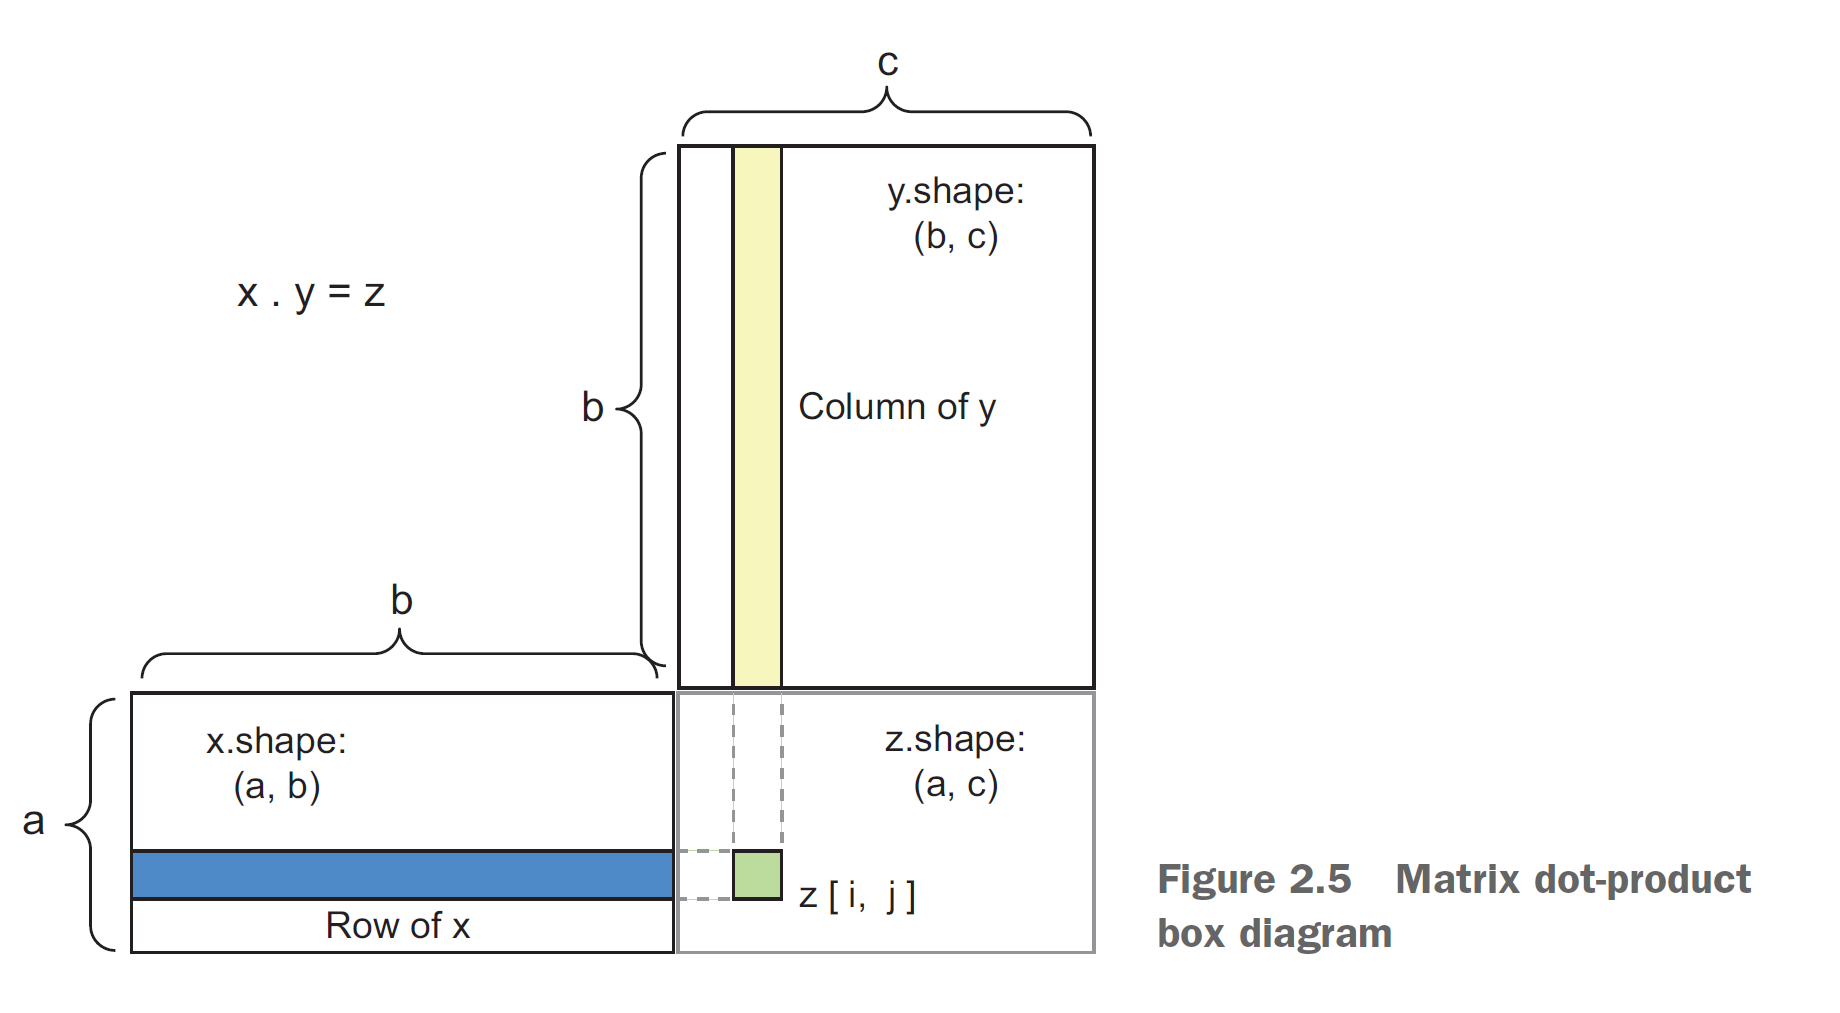

In [ ]:
display.Image("./pic1.PNG")

## Tensor reshaping

* A third type of tensor operation that’s essential to understand is tensor reshaping.
Although it wasn’t used in the Dense layers in our first neural network example, we
used it when we preprocessed the digits data before feeding it into our network:

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

* Reshaping a tensor means rearranging its rows and columns to match a target shape.
Naturally, the reshaped tensor has the same total number of coefficients as the initial
tensor.

In [ ]:
x = np.array(
                [ 
                  [0,1],
                  [2,3],
                  [4,5]
                ]
             )

print(x.shape)

(3, 2)


In [ ]:
x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
# reshaping 

x_1 = x.reshape((6,1))
x_1

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
# sayının yazılı olduğu yer kesin bilgi olarak belirtiyoruz, 
# kalan boyutu diğer bölgeye aktarıyoruz..
x_2 = x.reshape((-1,3))
x_2

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
x_3 = x.reshape((2, 3))
x_3

array([[0, 1, 2],
       [3, 4, 5]])

* A special case of reshaping that’s commonly encountered is transposition. Transposing a
matrix means exchanging its rows and its columns, so that x[i, :] becomes x[:, i]:

In [ ]:
x = np.zeros((300, 20))
print(f'first shape of x : {x.shape}')

x = np.transpose(x)
print(f'after shape of x : {x.shape}')

first shape of x : (300, 20)
after shape of x : (20, 300)


## Geometric interpretation of tensor operations

## A geometric interpretation of deep learning 

* You just learned that neural networks consist entirely of chains of tensor operations and
that all of these tensor operations are just geometric transformations of the input data.

# 2.4 The engine of neural networks:gradient-based optimization


* Let’s
say the initial value of the coefficient is 0.3. After the forward pass on a batch of data, the loss of the network on the batch is 0.5. If you change the coefficient’s value to 0.35 and rerun the forward pass, the loss increases to 0.6. But if you lower the coefficient to 0.25, the loss falls to 0.4. In this case, it seems that updating the coefficient by -0.05

* to take advantage of the fact that all operations used in the network
are differentiable, and compute the gradient of the loss with regard to the network’s
coefficients.

## What’s a derivative?

### Stochastic gradient descent

* Given a differentiable function, it’s theoretically possible to find its minimum analytically:
it’s known that a function’s minimum is a point where the derivative is 0, so all
you have to do is find all the points where the derivative goes to 0 and check for which
of these points the function has the lowest value.

* Applied to a neural network, that means finding analytically the combination of
weight values that yields the smallest possible loss function. This can be done by solving
the equation gradient(f)(W) = 0 for W. This is a polynomial equation of N variables,
where N is the number of coefficients in the network. Although it would be
possible to solve such an equation for N = 2 or N = 3, doing so is intractable for real
neural networks, where the number of parameters is never less than a few thousand
and can often be several tens of millions.

* Instead, you can use the four-step algorithm outlined at the beginning of this section:
modify the parameters little by little based on the current loss value on a random
batch of data. Because you’re dealing with a differentiable function, you can
compute its gradient, which gives you an efficient way to implement step 4. If you
update the weights in the opposite direction from the gradient, the loss will be a little
less every time:

  1 Draw a batch of training samples x and corresponding targets y.

  2 Run the network on x to obtain predictions y_pred.

  3 Compute the loss of the network on the batch, a measure of the mismatch
  between y_pred and y.

  4 Compute the gradient of the loss with regard to the network’s parameters (a backward pass).

  5 Move the parameters a little in the opposite direction from the gradient—for example W -= step * gradient—thus reducing the loss on the batch a bit.

Easy enough! What I just described is called mini-batch stochastic gradient descent (minibatch
SGD). The term stochastic refers to the fact that each batch of data is drawn at
random (stochastic is a scientific synonym of random). Figure 2.11 illustrates what happens
in 1D, when the network has only one parameter and you have only one training
sample.

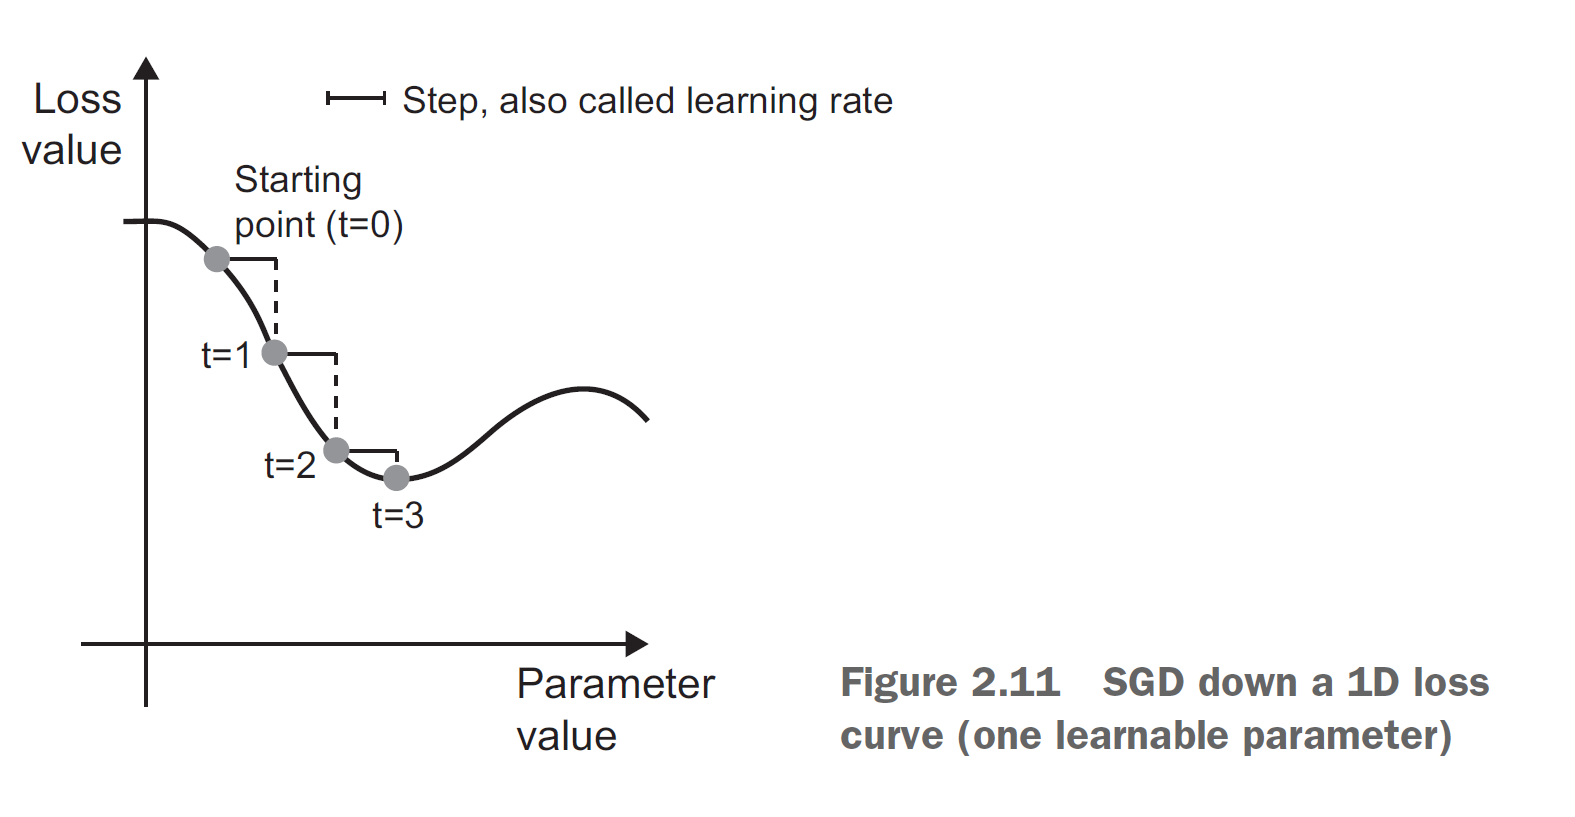

In [2]:
display.Image("./pic2.PNG")

* As you can see, intuitively it’s important to pick a reasonable value for the
factor.
step
If it’s too small, the descent down the curve will take many iterations, and it could get
stuck in a local minimum. If
is too large, your updates may end up taking you to
step
completely random locations on the curve.

## Momentum things...

* Additionally, there exist multiple variants of SGD that differ by taking into account
previous weight updates when computing the next weight update, rather than just
looking at the current value of the gradients. There is, for instance, SGD with momentum,
as well as Adagrad, RMSProp, and several others. Such variants are known as optimization
methods or optimizers. In particular, the concept of momentum, which is used in
many of these variants, deserves your attention. Momentum addresses two issues with
SGD: convergence speed and local minima.

In [ ]:
past_velocity = 0 
momentum = 0.1 #constant momentum factor
while loss > 0.01:  #optimization loop
  w, loss, gradient = get_current_parameters()
  velocity = past_velocity * momentum + learning_rate * gradient
  w = w + momentum*velocity - learning_rate*gradient
  past_velocity = velocity 
  update_parameters(w)


## Chaining derivatives: the Backpropagation algorithm

* a neural network function
consists of many tensor operations chained together, each of which has a simple,
known derivative. For instance, this is a network f composed of three tensor operations, a, b, and c, with weight matrices W1, W2, and W3

      f(W1, W2, W3) = a(W1, b(W2, c(W3)))


* Calculus tells us that such a chain of functions can be derived using the following identity,
called the chain rule: f(g(x)) = f'(g(x)) * g'(x). Applying the chain rule to the
computation of the gradient values of a neural network gives rise to an algorithm called Backpropagation (also sometimes called reverse-mode differentiation). Backpropagation
starts with the final loss value and works backward from the top layers to the bottom
layers, applying the chain rule to compute the contribution that each parameter
had in the loss value.

# 2.5 Looking back at our first example

* Let’s go back to
the first example and review each piece of it in the light of what you’ve learned in the
previous three sections.

In [12]:
(train_img, train_lbl), (test_img, test_lbl) = mnist.load_data()

In [13]:
train_img = train_img.reshape((60000, 28*28))
train_img = train_img.astype('float32') / 255 

test_img = test_img.reshape((10000, 28*28))
test_img = test_img.astype('float32') / 255

In [14]:
from keras import models 
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [15]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

* categorical_crossentropy is the loss function that’s used
as a feedback signal for learning the weight tensors, and which the training phase will
attempt to minimize. You also know that this reduction of the loss happens via minibatch
stochastic gradient descent. The exact rules governing a specific use of gradient
descent are defined by the rmsprop optimizer passed as the first argument.

In [16]:
from tensorflow.keras.utils import to_categorical 

train_lbl = to_categorical(train_lbl)
test_lbl = to_categorical(test_lbl)

In [17]:
network.fit(train_img, train_lbl, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2535 - accuracy: 0.9274
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1033 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0682 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0496 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0371 - accuracy: 0.9886


* When you call fit: the network will start to iterate
on the training data in mini-batches of 128 samples, 5 times over (each iteration over
all the training data is called an epoch). At each iteration, the network will compute the
gradients of the weights with regard to the loss on the batch, and update the weights accordingly. After these 5 epochs, the network will have performed 2,345 gradient
updates (469 per epoch), and the loss of the network will be sufficiently low that the
network will be capable of classifying handwritten digits with high accuracy.

Chapter summary

   Learning means finding a combination of model parameters that minimizes a loss function for a given set of training data samples and their corresponding targets.
  
   Learning happens by drawing random batches of data samples and their
  targets, and computing the gradient of the network parameters with
  respect to the loss on the batch. The network parameters are then moved
  a bit (the magnitude of the move is defined by the learning rate) in the
  opposite direction from the gradient.
  
   The entire learning process is made possible by the fact that neural networks are chains of differentiable tensor operations, and thus it’s possible
  to apply the chain rule of derivation to find the gradient function mapping
  the current parameters and current batch of data to a gradient value.
  
   Two key concepts you’ll see frequently in future chapters are loss and optimizers.These are the two things you need to define before you begin feeding data into a network.
  
   The loss is the quantity you’ll attempt to minimize during training, so it
  should represent a measure of success for the task you’re trying to solve.
  
   The optimizer specifies the exact way in which the gradient of the loss will
  be used to update parameters: for instance, it could be the RMSProp optimizer,
  SGD with momentum, and so on.
